<a href="https://colab.research.google.com/github/skrzypczykt/CycleGAN/blob/main/scripts/baseline_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#source summer2winter_yosemite
from google.colab import drive
drive.mount('/content/drive')

!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install -U tensorflow-addons
!pip install git+https://github.com/skrzypczykt/CycleGAN.git
!pip install matplotlib==3.1.1
%load_ext autoreload
%autoreload 2



# Download data 

!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be66e78_summer2winter-yosemite/summer2winter-yosemite.zip
!unzip -q summer2winter-yosemite.zip
!rm summer2winter-yosemite.zip
!mv ./summer2winter_yosemite ./summer2winter-yosemite

Mounted at /content/drive
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-rj42be6z
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-rj42be6z
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101065 sha256=cf3c3eb8ae31678743c853231cf82157f6a5ce9bc3b63d4941eb494f174670f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-w_tudut4/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
     |████████████████████████████████| 686kB 9.3MB/s 
  Cloning https://github.com/skrzypczykt/CycleGAN.git to /tmp/pip-req-build-937n7zdt
  Running command git clone -q https://github.com/skrzypczykt/CycleGAN.git /tmp/pip-req-build-937n7zdt
     |████████████████████████████████| 184kB 7.5MB/s 
     |████████████████████████████████| 13.1MB 220kB/s 
     |████████████████████████████████| 3.0MB 34.8MB/s 
     |█████████████████████████████

--2021-05-31 19:30:16--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be66e78_summer2winter-yosemite/summer2winter-yosemite.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.140.254
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.140.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133783376 (128M) [application/zip]
Saving to: ‘summer2winter-yosemite.zip’

summer2winter-yosem 100%[===================>] 127.58M  39.6MB/s    in 3.2s    

2021-05-31 19:30:19 (39.6 MB/s) - ‘summer2winter-yosemite.zip’ saved [133783376/133783376]



In [2]:
import os
from gans.CycleGAN import load_data, CycleGAN, check_directories, plot_gan_results, generate_test_results, get_last_epoch
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import matplotlib.pyplot as plt


Found 962 files belonging to 1 classes.
Found 1231 files belonging to 1 classes.
Found 238 files belonging to 1 classes.
Found 309 files belonging to 1 classes.
Found model: /content/drive/MyDrive/CycleGAN/resnet/checkpoints/weights/weights-19.h5
[Epoch 20/21] [Batch 0/962] [D loss: 0.513537622988224, acc: 39.4775390625] [G loss: 7.154829978942871, adv: 0.5138005316257477, recon:0.5557641386985779, id: ] time: 0.5416939556598663 


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


[Epoch 20/21] [Batch 1/962] [D loss: 0.3599247895181179, acc: 52.1240234375] [G loss: 10.927913665771484, adv: 0.8764264583587646, recon:0.8422267138957977, id: ] time: 0.8146098852157593 
[Epoch 20/21] [Batch 2/962] [D loss: 0.34552472829818726, acc: 53.6376953125] [G loss: 10.239675521850586, adv: 0.8328676521778107, recon:0.7923243045806885, id: ] time: 0.7417824268341064 
[Epoch 20/21] [Batch 3/962] [D loss: 0.30686336010694504, acc: 51.708984375] [G loss: 9.204855918884277, adv: 0.8316901922225952, recon:0.7070883214473724, id: ] time: 0.6511413753032684 
[Epoch 20/21] [Batch 4/962] [D loss: 0.2967335991561413, acc: 59.0576171875] [G loss: 9.068181037902832, adv: 1.0132448971271515, recon:0.6768938302993774, id: ] time: 0.6429989039897919 
[Epoch 20/21] [Batch 5/962] [D loss: 0.3334934189915657, acc: 52.4169921875] [G loss: 11.812830924987793, adv: 0.774997889995575, recon:0.9255176186561584, id: ] time: 0.8913283944129944 
[Epoch 20/21] [Batch 6/962] [D loss: 0.3788287714123726, 

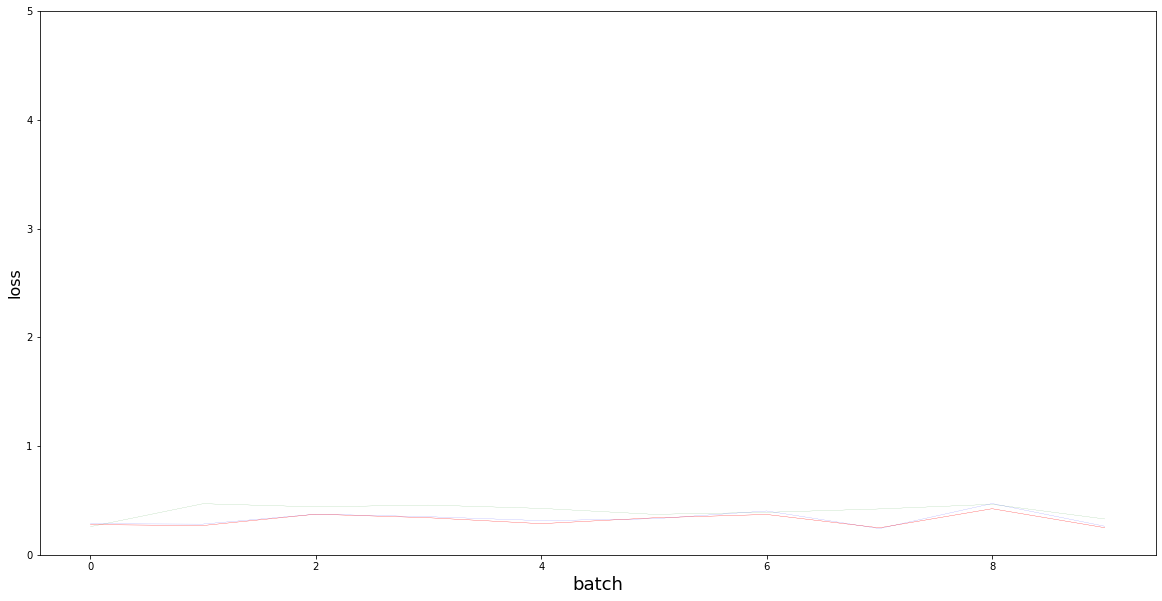

In [3]:
data_dir = '/content/summer2winter-yosemite'
#data_dir = '../data/summer2winter_yosemite'

IMG_WIDTH = 256
IMG_HEIGHT = 256

RESTORE_TRAINING = True

PROJECT_ROOT_DIR = "/content/drive/MyDrive/CycleGAN/resnet/"
# PROJECT_ROOT_DIR = "../trainings/resnet/"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
checkpoint_path = os.path.join(PROJECT_ROOT_DIR, "checkpoints")

check_directories(PROJECT_ROOT_DIR)

#load data
train_winter, test_winter, train_summer, test_summer, sample_A, sample_B, length = load_data(data_dir, IMG_WIDTH, IMG_HEIGHT)


gan = CycleGAN(
        input_dim=(IMG_WIDTH, IMG_HEIGHT, 3)
        , learning_rate=0.0002
        , buffer_max_length=50
        , lambda_validation=1
        , lambda_reconstr=10
        , lambda_id=2
        , generator_type='resnet'
        , gen_n_filters=32
        , disc_n_filters=32
        , n_batches=length
    )



if RESTORE_TRAINING:
    max_epoch = get_last_epoch(checkpoint_path)
    model_found = os.path.join(checkpoint_path, f'weights/weights-{max_epoch}.h5')
    print("Found model:", model_found)
    gan.load_weights(model_found)
    gan.epoch = max_epoch
else:
    print("Training from scratch:")
    gan.save(checkpoint_path)

EPOCHS = 1
PRINT_EVERY_N_BATCHES = 1000

"""##train"""

gan.train(tf.data.Dataset.zip((train_winter.take(10), train_summer.take(10)))
          , run_folder=checkpoint_path
          , epochs=EPOCHS
          , test_A_file=sample_A
          , test_B_file=sample_B
          , batch_size=1
          , sample_interval=PRINT_EVERY_N_BATCHES)

"""##Loss"""
plot_gan_results(gan)



"""#Test"""
generate_test_results(gan, tf.data.Dataset.zip((test_winter.take(10), test_summer.take(10))), PROJECT_ROOT_DIR)
